In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Basics").getOrCreate()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pylab import rcParams
from pyspark.sql.functions import avg
import pyspark.sql.functions as f
import pyspark.sql.functions as F
from pyspark.sql.window import Window  # ***
from pyspark.sql.functions import sum
from pyspark.sql.functions import format_number
import matplotlib.pyplot as plt

df = spark.read.csv("healthcare-dataset-stroke-data/healthcare-dataset-stroke-data.csv", inferSchema=True, header=True)
stroke_count = df.filter(F.col("stroke") == 1).count()

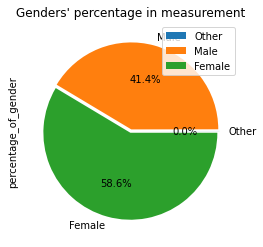

In [11]:
df_mes = df.groupBy('gender').count().select('gender',f.col('count').alias('count_gender')).withColumn('percentage_of_gender',(f.col('count_gender') / df.count()) * 100 ).select('gender','count_gender',(format_number('percentage_of_gender',2).alias('percentage_of_gender'))).orderBy('count_gender')


pandas_df = df_mes.toPandas().astype({"gender": "string","count_gender": "int32", "percentage_of_gender": "float64"})

explode = (0.02,0.02,0.02)
labels = ['Other','Male','Female']


pandas_df.plot.pie(y="percentage_of_gender",labels=labels,autopct='%1.1f%%',explode=explode).set_title('Genders\' percentage in measurement')
plt.show()

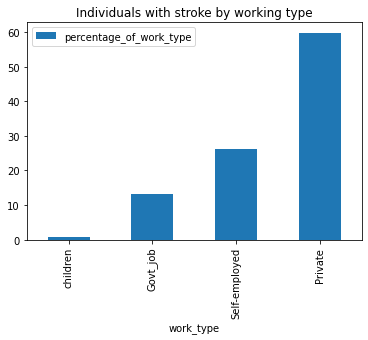

In [13]:
# influence of work type on getting stroke
# more private
df_work_type_stroke = (
    df.groupBy("work_type", "stroke")
    .count()
    .select("stroke", "work_type", f.col("count").alias("work_type_count"))
    .withColumn("percentage_of_work_type", (f.col("work_type_count") / stroke_count) * 100)
    .filter(df["stroke"] == 1)
    .select("work_type", (format_number("percentage_of_work_type", 2).alias("percentage_of_work_type")))
    .orderBy("work_type_count")
)

pandas_df = df_work_type_stroke.toPandas().astype({"work_type": "string", "percentage_of_work_type": "float64"})

# stroke - work_type
pandas_df.plot.bar(x="work_type", y="percentage_of_work_type").set_title('Individuals with stroke by working type')
plt.show()

In [6]:
df_work_stroke_gender = (
    df.groupBy("gender", "work_type", "stroke")
    .count()
    .select("gender", "stroke", "work_type", f.col("count").alias("work_type_count"))
    .withColumn("percentage_of_work_type", (f.col("work_type_count") / stroke_count) * 100)
    .filter(df["stroke"] == 1)
    .select("gender", "work_type", (format_number("percentage_of_work_type", 2).alias("percentage_of_work_type")))
    .orderBy("work_type")
)

df_work_stroke_gender_w = df_work_stroke_gender.filter(f.col('gender')=='Female')
df_work_stroke_gender_m = df_work_stroke_gender.filter(f.col('gender')=='Male')

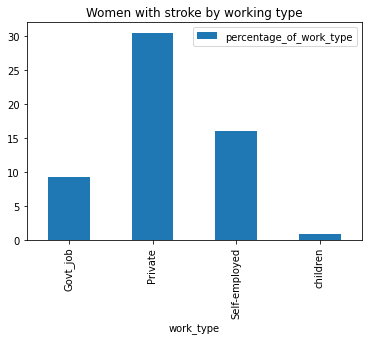

In [11]:
pandas_df = df_work_stroke_gender_w.toPandas().astype(
    {"gender": "string", "work_type": "string", "percentage_of_work_type": "float64"}
)

pandas_df.plot.bar(x="work_type", y="percentage_of_work_type").set_title('Women with stroke by working type')
plt.show()

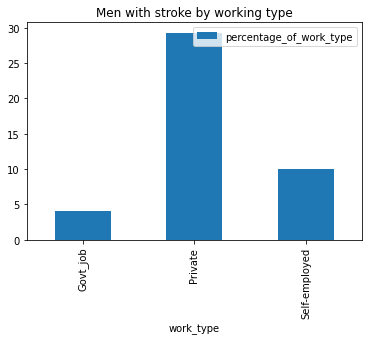

In [10]:
pandas_df = df_work_stroke_gender_m.toPandas().astype(
    {"gender": "string", "work_type": "string", "percentage_of_work_type": "float64"}
)

pandas_df.plot.bar(x="work_type", y="percentage_of_work_type").set_title('Men with stroke by working type')
plt.show()

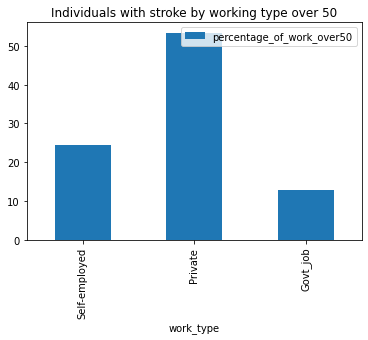

In [17]:
df_work_age = df.select('age','work_type','stroke').filter((df['stroke'] == 1) & (df['age'] > '50')).groupBy('work_type').count().withColumn('percentage_of_work_over50',(f.col('count') / stroke_count) * 100 ).select('work_type',(format_number('percentage_of_work_over50',2).alias('percentage_of_work_over50'))) 

pandas_df = df_work_age.toPandas().astype(
    {"work_type": "string",  "percentage_of_work_over50": "float64"}
)

pandas_df.plot.bar(x="work_type", y="percentage_of_work_over50").set_title('Individuals with stroke by working type over 50')
plt.show()

+------+------------+--------------------+
|gender|count_gender|percentage_of_stroke|
+------+------------+--------------------+
|Female|          19|                7.63|
|  Male|          28|               11.24|
+------+------------+--------------------+



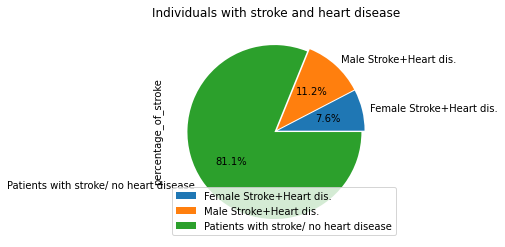

In [48]:
#people who have heart disease and stroke
df_stroke_heartdisease = df.groupBy('gender', 'stroke', 'heart_disease').count().select('gender',f.col('count').alias('count_gender')).withColumn('percentage_of_stroke',(f.col('count_gender') / stroke_count) * 100 ).filter((df['stroke'] == 1) & (df['heart_disease'] == '1')).select('gender','count_gender',(format_number('percentage_of_stroke',2).alias('percentage_of_stroke'))).orderBy('count_gender')

df_stroke_heartdisease.show()

pandas_df = df_stroke_heartdisease.toPandas().astype({"gender": "string","count_gender": "int32", "percentage_of_stroke": "float64"})

temp_df = pd.DataFrame([['No heart disease',stroke_count-19-28,100-7.63-11.24]],columns=['gender','count_gender','percentage_of_stroke'])


pandas_df = pd.concat([pandas_df,temp_df])

explode = (0.02,0.02,0.02)
labels = ['Female Stroke+Heart dis.','Male Stroke+Heart dis.','Patients with stroke/ no heart disease']



pandas_df.plot.pie(y="percentage_of_stroke",labels=labels,autopct='%1.1f%%',explode=explode).set_title('Individuals with stroke and heart disease')
plt.show()

+------+------------+--------------------+
|gender|count_gender|percentage_of_stroke|
+------+------------+--------------------+
|  Male|          27|               10.84|
|Female|          39|               15.66|
+------+------------+--------------------+



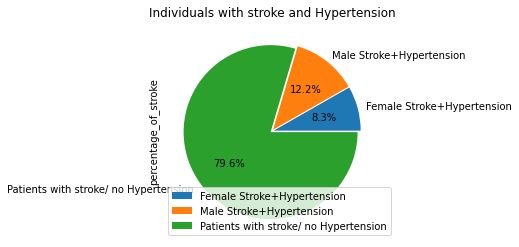

In [49]:
#people who have hypertension and stroke
df_stroke_hypertension = df.groupBy('gender', 'stroke', 'hypertension').count().select('gender',f.col('count').alias('count_gender')).withColumn('percentage_of_stroke',(f.col('count_gender') / stroke_count) * 100 ).filter((df['stroke'] == 1) & (df['hypertension'] == '1')).select('gender','count_gender',(format_number('percentage_of_stroke',2).alias('percentage_of_stroke'))).orderBy('count_gender')

df_stroke_hypertension.show()

pandas_df = df_stroke_heartdisease.toPandas().astype({"gender": "string","count_gender": "int32", "percentage_of_stroke": "float64"})

temp_df = pd.DataFrame([['No hypertension',stroke_count-27-39,100-10.84-15.66]],columns=['gender','count_gender','percentage_of_stroke'])

pandas_df = pd.concat([pandas_df,temp_df])

explode = (0.02,0.02,0.02)
labels = ['Female Stroke+Hypertension','Male Stroke+Hypertension','Patients with stroke/ no Hypertension']



pandas_df.plot.pie(y="percentage_of_stroke",labels=labels,autopct='%1.1f%%',explode=explode).set_title('Individuals with stroke and Hypertension')
plt.show()


+------+------------+--------------------+
|gender|count_gender|percentage_of_stroke|
+------+------------+--------------------+
|Female|           7|                2.81|
|  Male|           6|                2.41|
+------+------------+--------------------+



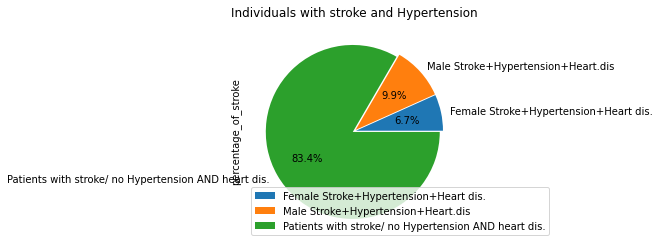

In [52]:
#people have heart disease and hypertension and stroke
df_stroke_heartd_hyperd = df.groupBy('gender', 'stroke', 'heart_disease','hypertension').count().select('gender',f.col('count').alias('count_gender')).withColumn('percentage_of_stroke',(f.col('count_gender') / stroke_count) * 100 ).filter((df['stroke'] == 1) & (df['heart_disease'] == '1') & (df['hypertension'] == '1')).select('gender','count_gender',(format_number('percentage_of_stroke',2).alias('percentage_of_stroke')))

df_stroke_heartd_hyperd.show()


pandas_df = df_stroke_heartdisease.toPandas().astype({"gender": "string","count_gender": "int32", "percentage_of_stroke": "float64"})

temp_df = pd.DataFrame([['No hypertension',stroke_count-7-6,100-2.81-2.41]],columns=['gender','count_gender','percentage_of_stroke'])

pandas_df = pd.concat([pandas_df,temp_df])

explode = (0.02,0.02,0.02)
labels = ['Female Stroke+Hypertension+Heart dis.','Male Stroke+Hypertension+Heart.dis','Patients with stroke/ no Hypertension AND heart dis.']



pandas_df.plot.pie(,autopct='%1.1f%%',explode=explode).set_title('Individuals with stroke and Hypertension')
plt.show()

+---------------+--------------------+--------------------+
| smoking_status|count_smoking_status|percentage_of_stroke|
+---------------+--------------------+--------------------+
|         smokes|                  42|               16.87|
|        Unknown|                  47|               18.88|
|formerly smoked|                  70|               28.11|
|   never smoked|                  90|               36.14|
+---------------+--------------------+--------------------+



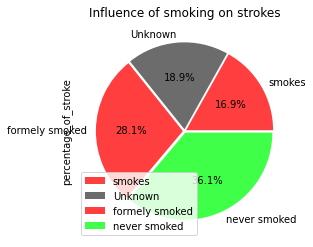

In [75]:
#influence of smoking_status on getting stroke
df_stroke_smoking= df.groupBy('smoking_status', 'stroke').count().select('smoking_status',f.col('count').alias('count_smoking_status')).withColumn('percentage_of_stroke',(f.col('count_smoking_status') / stroke_count) * 100 ).filter((df['stroke'] == 1)).select('smoking_status','count_smoking_status',(format_number('percentage_of_stroke',2).alias('percentage_of_stroke'))).orderBy('count_smoking_status')

df_stroke_smoking.show()


pandas_df = df_stroke_smoking.toPandas().astype({'smoking_status': "string",'count_smoking_status': "int32", "percentage_of_stroke": "float64"})

explode = (0.02,0.02,0.02,0.02)
labels = ['smokes','Unknown','formely smoked','never smoked']
colors = ["#FF3F3F","#6C6C6C", "#FF3F3F","#3FFF48"]



pandas_df.plot.pie(y='percentage_of_stroke',labels=labels,autopct='%1.1f%%',explode=explode,colors=colors).set_title('Influence of smoking on strokes')
plt.show()

+--------------+--------------------+--------------------+
|Residence_type|count_Residence_type|percentage_of_stroke|
+--------------+--------------------+--------------------+
|         Rural|                 114|               45.78|
|         Urban|                 135|               54.22|
+--------------+--------------------+--------------------+



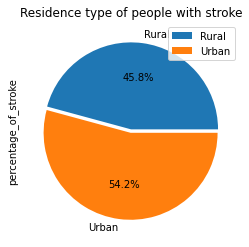

In [80]:
#influence of Residence_type on getting stroke 
df_stroke_restype= df.groupBy('Residence_type', 'stroke').count().select('Residence_type',f.col('count').alias('count_Residence_type')).withColumn('percentage_of_stroke',(f.col('count_Residence_type') / stroke_count) * 100 ).filter((df['stroke'] == 1)).select('Residence_type','count_Residence_type',(format_number('percentage_of_stroke',2).alias('percentage_of_stroke'))).orderBy('count_Residence_type')

df_stroke_restype.show()


pandas_df = df_stroke_restype.toPandas().astype({'Residence_type': "string",'count_Residence_type': "int32", "percentage_of_stroke": "float64"})

explode = (0.02,0.02)
labels = ['Rural','Urban']


pandas_df.plot.pie(y='percentage_of_stroke',labels=labels,autopct='%1.1f%%',explode=explode).set_title('Residence type of people with stroke')
plt.show()

+------------+------------------+--------------------+
|ever_married|count_ever_married|percentage_of_stroke|
+------------+------------------+--------------------+
|          No|                29|               11.65|
|         Yes|               220|               88.35|
+------------+------------------+--------------------+



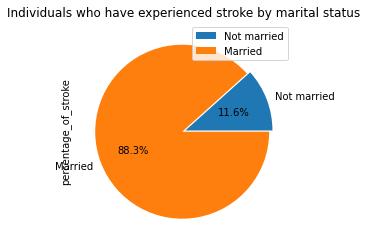

In [84]:
#influence of ever_married on getting stroke
#if married more influence on getting stroke
df_stroke_ever_married= df.groupBy('ever_married', 'stroke').count().select('ever_married',f.col('count').alias('count_ever_married')).withColumn('percentage_of_stroke',(f.col('count_ever_married') / stroke_count) * 100 ).filter((df['stroke'] == 1)).select('ever_married','count_ever_married',(format_number('percentage_of_stroke',2).alias('percentage_of_stroke'))).orderBy('count_ever_married')

df_stroke_ever_married.show()

pandas_df = df_stroke_ever_married.toPandas().astype({'ever_married': "string",'count_ever_married': "int32", "percentage_of_stroke": "float64"})

explode = (0.02,0.02)
labels = ['Not married','Married']


pandas_df.plot.pie(y='percentage_of_stroke',labels=labels,autopct='%1.1f%%',explode=explode).set_title('Individuals who have experienced stroke by marital status')
plt.show()

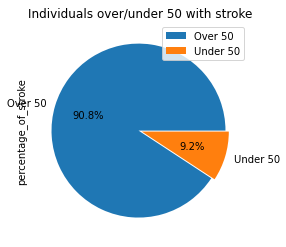

In [91]:
over_50_stroke = df.filter((df['stroke'] == 1) & (df['age'] > '50')).count()
under_50_stroke = stroke_count - over_50_stroke

pandas_df = pd.DataFrame([['over_50',over_50_stroke,over_50_stroke/stroke_count*100],['under_50',under_50_stroke,under_50_stroke/stroke_count*100]],columns=['age','age_count','percentage_of_stroke'])


explode = (0.02,0.02)
labels = ['Over 50','Under 50']


pandas_df.plot.pie(y='percentage_of_stroke',labels=labels,autopct='%1.1f%%',explode=explode).set_title('Individuals over/under 50 with stroke')
plt.show()

+------+--------+--------+----------------------+
|stroke|avg(bmi)|avg(age)|avg(avg_glucose_level)|
+------+--------+--------+----------------------+
|     1|   30.47|   67.73|                132.54|
|     0|   28.82|   41.97|                 104.8|
+------+--------+--------+----------------------+



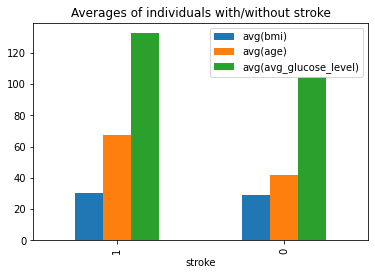

In [108]:
df_avg = df.groupBy("stroke").agg(F.round(F.mean('bmi'),scale=2), F.round(F.mean('age'),scale=2), F.round(F.mean('avg_glucose_level'),scale=2)).withColumnRenamed('round(avg(bmi), 2)','avg(bmi)').withColumnRenamed('round(avg(age), 2)','avg(age)').withColumnRenamed('round(avg(avg_glucose_level), 2)','avg(avg_glucose_level)')
df_avg.show()

pandas_df = df_avg.toPandas().astype({'stroke': "int32",'avg(bmi)': "float64", "avg(age)": "float64","avg(avg_glucose_level)":"float64"}).set_index('stroke')

pandas_df.plot.bar().set_title('Averages of individuals with/without stroke')
plt.show()
